<a href="https://colab.research.google.com/github/Mohitvenkatasai/Auto_price/blob/main/Auto_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import json
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.utils import all_estimators

# Get all available estimators
estimators = all_estimators(type_filter=None)  # Set type_filter to 'None' to get all types of estimators

# Print the names of all available estimators
for name, estimator_class in estimators:
    print(name)

ARDRegression
AdaBoostClassifier
AdaBoostRegressor
AdditiveChi2Sampler
AffinityPropagation
AgglomerativeClustering
BaggingClassifier
BaggingRegressor
BayesianGaussianMixture
BayesianRidge
BernoulliNB
BernoulliRBM
Binarizer
Birch
BisectingKMeans
CCA
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ColumnTransformer
ComplementNB
CountVectorizer
DBSCAN
DecisionTreeClassifier
DecisionTreeRegressor
DictVectorizer
DictionaryLearning
DummyClassifier
DummyRegressor
ElasticNet
ElasticNetCV
EllipticEnvelope
EmpiricalCovariance
ExtraTreeClassifier
ExtraTreeRegressor
ExtraTreesClassifier
ExtraTreesRegressor
FactorAnalysis
FastICA
FeatureAgglomeration
FeatureHasher
FeatureUnion
FunctionTransformer
GammaRegressor
GaussianMixture
GaussianNB
GaussianProcessClassifier
GaussianProcessRegressor
GaussianRandomProjection
GenericUnivariateSelect
GradientBoostingClassifier
GradientBoostingRegressor
GraphicalLasso
GraphicalLassoCV
GridSearchCV
HDBSCAN
HashingVectorizer
HistGradientBoostingClassifier
HistG

### Loading and Read the data

In [ ]:
df=pd.read_csv('autos_dataset.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Checking the Shape of the data

In [ ]:
df.shape

(205, 26)

### Checking the statistical information

In [ ]:
df.describe().T   ## 7 type stats data point

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
normalized-losses,205,52,?,41
make,205,22,toyota,32
fuel-type,205,2,gas,185
aspiration,205,2,std,168
num-of-doors,205,3,four,114
body-style,205,5,sedan,96
drive-wheels,205,3,fwd,120
engine-location,205,2,front,202
engine-type,205,7,ohc,148
num-of-cylinders,205,7,four,159


### Checking null values

In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Looking for Data types

In [ ]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Checking values in first column

In [ ]:
df['normalized-losses'].value_counts().to_dict()

{'?': 41,
 '161': 11,
 '91': 8,
 '150': 7,
 '134': 6,
 '128': 6,
 '104': 6,
 '85': 5,
 '94': 5,
 '65': 5,
 '102': 5,
 '74': 5,
 '168': 5,
 '103': 5,
 '95': 5,
 '106': 4,
 '93': 4,
 '118': 4,
 '148': 4,
 '122': 4,
 '83': 3,
 '125': 3,
 '154': 3,
 '115': 3,
 '137': 3,
 '101': 3,
 '119': 2,
 '87': 2,
 '89': 2,
 '192': 2,
 '197': 2,
 '158': 2,
 '81': 2,
 '188': 2,
 '194': 2,
 '153': 2,
 '129': 2,
 '108': 2,
 '110': 2,
 '164': 2,
 '145': 2,
 '113': 2,
 '256': 1,
 '107': 1,
 '90': 1,
 '231': 1,
 '142': 1,
 '121': 1,
 '78': 1,
 '98': 1,
 '186': 1,
 '77': 1}

### We have '?' which are null values which have 41 values, replacing with NAN values.

In [ ]:
df['normalized-losses'].replace({'?':np.nan},inplace=True)

In [ ]:
df['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

### Peak-rpm Have '?' values which are nan values replaced with 'nan' values

In [ ]:
df['peak-rpm'].replace({'?':np.nan},inplace=True)

In [ ]:
df['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', nan, '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

### Horsepower has '?' Values with nan values replaced with 'nan' valuues

In [ ]:
df['horsepower'].replace({'?':np.nan},inplace=True)

In [ ]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

### checking null values

In [ ]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [ ]:
df['normalized-losses'].dtypes ### The column has numerical values but it is in Object changing the data type

dtype('O')

In [ ]:
df['normalized-losses']=df['normalized-losses'].astype(float) ## Converting the object values to float

<Axes: >

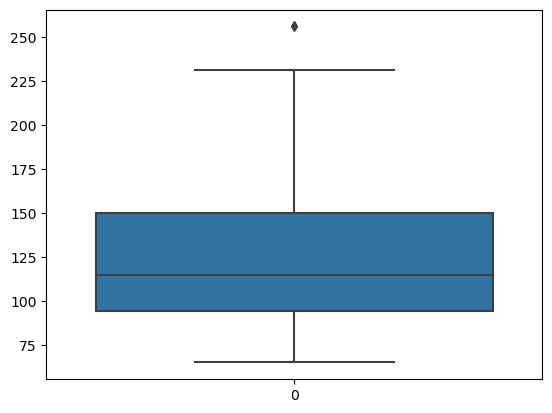

In [ ]:
sns.boxplot(df['normalized-losses']) ## as we can see we have ouliter we are filling 'nan' values with median.

In [ ]:
df['normalized-losses'].fillna(df['normalized-losses'].median(),inplace=True)

In [ ]:
df['horsepower'].dtypes ### as the horse power is a Object dtypes converting into int dtype

dtype('O')

In [ ]:
df['horsepower']=df['horsepower'].astype(float) ## converted to float values

<Axes: >

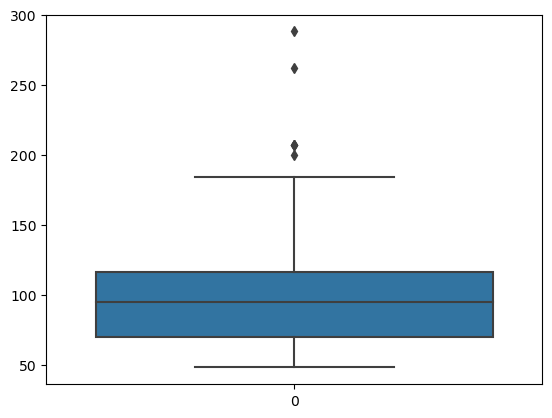

In [ ]:
sns.boxplot(df['horsepower']) ## we have ouliters, filling with median

In [ ]:
df['horsepower'].fillna(df['horsepower'].median(),inplace=True)

In [ ]:
df['peak-rpm'].dtypes ## Peak-rpm should be a int values. but the data type showing is Object, so need to convetr to flot or int

dtype('O')

In [ ]:
df['peak-rpm']=df['peak-rpm'].astype(float) ## Converted to float

<Axes: >

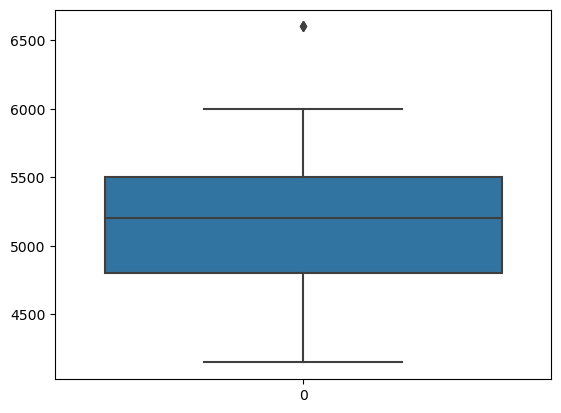

In [ ]:
sns.boxplot(df['peak-rpm']) ## we have ouliers, filling with median.

In [ ]:
df['peak-rpm'].fillna(df['peak-rpm'].median(),inplace=True)

#### As bore and strike are in values but they are in object data type changing their dtype to int

In [ ]:
df['bore'].value_counts().to_dict() ### '?' values change to nan values

{'3.62': 23,
 '3.19': 20,
 '3.15': 15,
 '3.03': 12,
 '2.97': 12,
 '3.46': 9,
 '3.31': 8,
 '3.78': 8,
 '3.43': 8,
 '3.27': 7,
 '2.91': 7,
 '3.39': 6,
 '3.54': 6,
 '3.05': 6,
 '3.58': 6,
 '3.7': 5,
 '3.01': 5,
 '3.35': 4,
 '?': 4,
 '3.17': 3,
 '3.59': 3,
 '3.74': 3,
 '3.47': 2,
 '3.94': 2,
 '3.24': 2,
 '3.13': 2,
 '3.63': 2,
 '3.5': 2,
 '3.8': 2,
 '3.33': 2,
 '2.54': 1,
 '3.08': 1,
 '3.61': 1,
 '3.34': 1,
 '3.6': 1,
 '2.92': 1,
 '3.76': 1,
 '2.68': 1,
 '2.99': 1}

In [ ]:
df['bore'].replace({'?':np.nan},inplace=True)
df['bore'].isnull().sum()

4

In [ ]:
df['bore']=df['bore'].astype(float)

<Axes: >

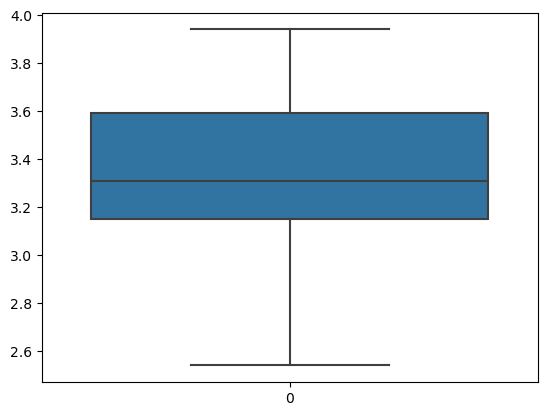

In [ ]:
sns.boxplot(df['bore'])   ### as we dont have any ouliter we can fill with mean values.

In [ ]:
df['bore'].fillna(df['bore'].median(),inplace=True)
df['bore'].isnull().sum()

0

In [ ]:
df['stroke'].replace({'?':np.nan},inplace=True)
df['stroke'].isnull().sum()
df['stroke']=df['stroke'].astype(float)

<Axes: >

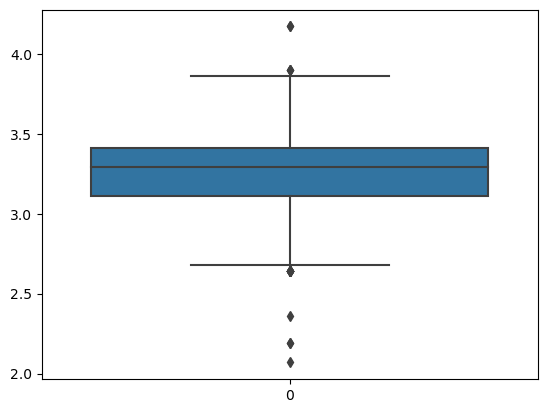

In [ ]:
sns.boxplot(df['stroke']) ## as we have ouliers filling with median

In [ ]:
df['stroke'].fillna(df['stroke'].median(),inplace=True)
df['stroke'].isnull().sum()

0

In [ ]:
df=df.replace({'?':np.nan})

In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [ ]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

<Axes: >

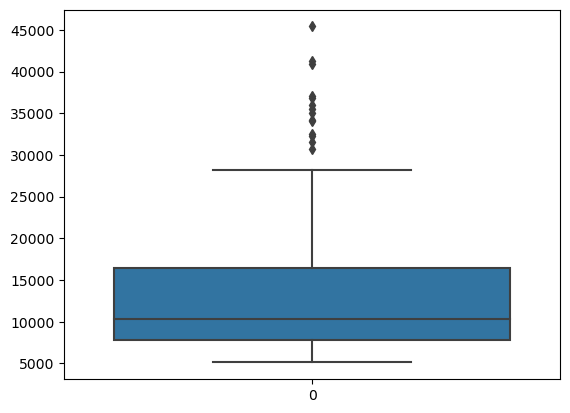

In [ ]:
 sns.boxplot(df['price']) ## we have ouliers in the cloumn so filling wih median values.

In [ ]:
print(df['price'].dtype)

object


In [ ]:
df['price'].fillna(df['price'].median(),inplace=True)

In [ ]:
df['price']=df['price'].astype(int)
print(df['price'])

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int32


C:\Users\DELL\AppData\Local\Temp\ipykernel_4796\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

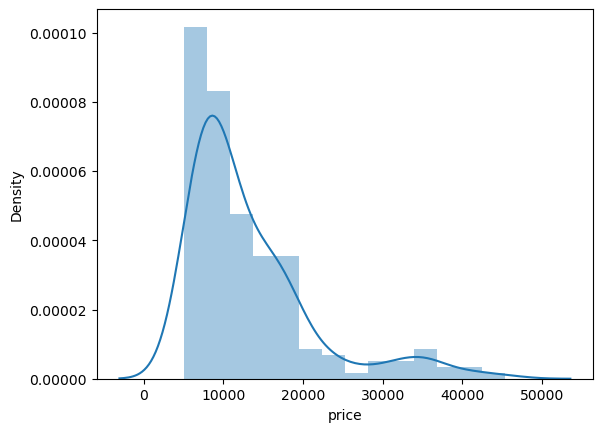

In [ ]:
sns.distplot(df['price'])

In [ ]:
p=sorted(df['price'])
q1,q3=np.percentile(p,[25,75])
iqr=q3-q1
L_b=q1-(1.5*(iqr))
U_b=q3+(1.5*(iqr))
below=df['price'] > L_b
above=df['price'] < U_b
df=df[below & above]

<Axes: >

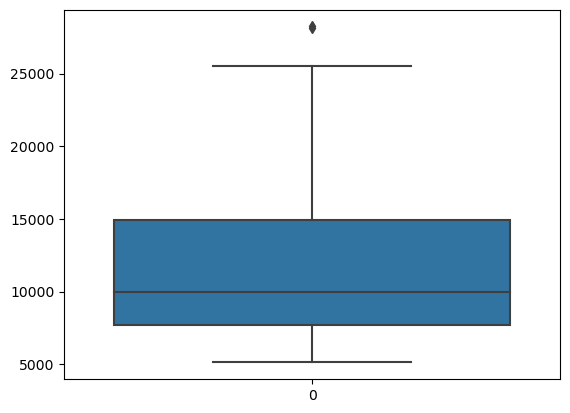

In [ ]:
 sns.boxplot(df['price'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_4796\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

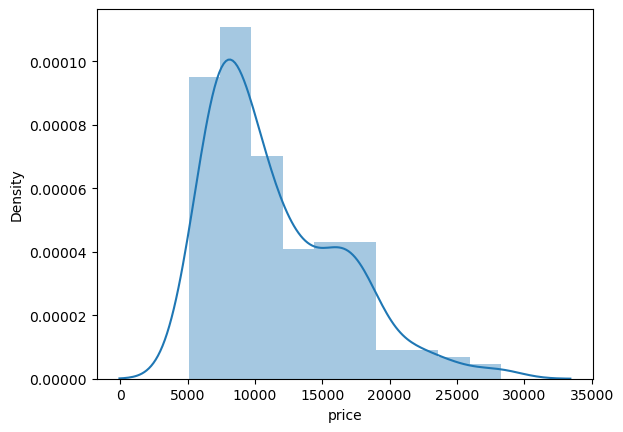

In [ ]:
sns.distplot(df['price'])

In [ ]:
df.shape

(191, 26)

In [ ]:
df.duplicated().sum() # we can see there are no duplicate values.

0

In [ ]:
X=df.drop('price',axis=1)
y=df['price']

In [ ]:
o_b=X.select_dtypes(include=['object'])
o_b

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [ ]:
one_hot=OneHotEncoder()
one_hot

OneHotEncoder()

In [ ]:
o_b1=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
transformer=ColumnTransformer([('one_hot',
                               one_hot,
                               o_b1)],
                             remainder='passthrough')
transformed_X=transformer.fit_transform(X)
transformed_X

array([[1.0e+00, 0.0e+00, 0.0e+00, ..., 5.0e+03, 2.1e+01, 2.7e+01],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 5.0e+03, 2.1e+01, 2.7e+01],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 5.0e+03, 1.9e+01, 2.6e+01],
       ...,
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 5.5e+03, 1.8e+01, 2.3e+01],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 4.8e+03, 2.6e+01, 2.7e+01],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 5.4e+03, 1.9e+01, 2.5e+01]])

In [ ]:
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(transformed_X, y, test_size=0.2,random_state=42)  ### Random state 43 for goof accuracy
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((152, 72), (39, 72), (152,), (39,))

In [ ]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Training data Model fitting and evalution

In [ ]:
y_predict=model.predict(X_train)
MSE=mean_squared_error(y_train,y_predict)
print(MSE)
RMSE=np.sqrt(MSE)
print(RMSE)
MAE=mean_absolute_error(y_train,y_predict)
print(MAE)
R2=r2_score(y_train,y_predict)
print(R2)

1076834.1064962086
1037.7061754158585
809.4016498766447
0.958772509508906


In [ ]:
y_pred_= model.predict(X_test)
MSE=mean_squared_error(y_test,y_pred_)
print(MSE)
RMSE=np.sqrt(MSE)
print(RMSE)
MAE=mean_absolute_error(y_test,y_pred_)
print(MAE)
R2=r2_score(y_test,y_pred_)
print(R2)
n = transformed_X.shape[0]
k = transformed_X.shape[1]
adjusted_r2 = 1 - ((1 - R2) * (n - 1) / (n - k - 1))
print('Adjusted R2=',adjusted_r2)

7.968140498999456e+24
2822789488962.905
452008071031.3862
-5.6036123717956966e+17
Adjusted R2= -9.02276568339985e+17


##### We got underfittting so need to work on testing data

In [ ]:
std=StandardScaler()
X_trained_scale=std.fit_transform(X_train)
X_test_scaled=std.fit_transform(X_test)

In [ ]:
X_train1=pd.DataFrame(X_trained_scale)
X_train1.head()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,-0.141895,-0.184428,-0.184428,-0.081379,-0.202721,3.41565,-0.141895,-0.330891,-0.141895,-0.081379,...,-0.247176,-0.476606,-0.339294,-0.622886,1.061258,-0.336297,-0.364085,1.457549,0.203228,0.255645
1,-0.141895,-0.184428,-0.184428,-0.081379,-0.202721,-0.29277,-0.141895,-0.330891,-0.141895,-0.081379,...,1.188113,1.281159,0.024406,0.562031,-3.360405,-0.475955,-0.099296,-0.234460,-1.104314,-1.154524
2,-0.141895,-0.184428,-0.184428,-0.081379,-0.202721,-0.29277,-0.141895,3.022141,-0.141895,-0.081379,...,-0.078319,-0.261917,0.097146,0.294469,0.456858,-0.429402,-0.422927,-0.657462,0.039785,0.098959
3,-0.141895,-0.184428,-0.184428,-0.081379,-0.202721,-0.29277,-0.141895,-0.330891,-0.141895,-0.081379,...,0.428254,0.330714,-0.412034,1.173602,-1.928931,-0.638889,0.371440,-0.657462,-0.450543,-1.311209
4,-0.141895,-0.184428,-0.184428,-0.081379,-0.202721,-0.29277,-0.141895,-0.330891,-0.141895,-0.081379,...,0.259396,-1.371142,-0.812105,-0.622886,0.138752,-0.243191,-0.864242,0.188542,0.857000,0.882386


In [ ]:
X_test1=pd.DataFrame(X_test_scaled)
X_test1.head()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.0,-0.232495,0.0,-0.232495,-0.288675,-0.162221,-0.162221,-0.232495,0.0,0.0,...,-0.221272,-0.261912,-0.705772,-0.151206,-0.757707,0.107515,0.482829,3.053668,-0.070538,-0.453631
1,0.0,-0.232495,0.0,-0.232495,-0.288675,-0.162221,-0.162221,-0.232495,0.0,0.0,...,-0.613528,-0.026191,0.184528,0.251697,0.755665,-0.298705,-0.340355,-0.433045,-0.223370,-0.003844
2,0.0,-0.232495,0.0,-0.232495,-0.288675,-0.162221,-0.162221,-0.232495,0.0,0.0,...,-0.064370,1.253438,1.074827,1.240639,0.914967,0.062380,0.620026,-0.868885,-0.376202,-0.303702
3,0.0,-0.232495,0.0,-0.232495,-0.288675,-0.162221,-0.162221,-0.232495,0.0,0.0,...,-0.927333,-1.061119,-0.928347,-1.140148,-0.160323,0.107515,-1.026341,0.656553,0.693622,0.895730
4,0.0,-0.232495,0.0,-0.232495,-0.288675,-0.162221,-0.162221,4.301163,0.0,0.0,...,0.484788,0.636073,0.629678,0.544716,1.472525,5.794600,-0.889144,-2.176402,0.693622,1.045659


In [ ]:
y_trained_scaled = std.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = std.fit_transform(y_test.values.reshape(-1, 1))

In [ ]:
y_train1=pd.DataFrame(y_trained_scaled)
y_train1.head()

,0
0,-0.535333
1,0.733572
2,-0.241831
3,-0.026792
4,-1.238953


In [ ]:
y_test1=pd.DataFrame(y_test_scaled)
y_test1.head()

,0
0,-0.149533
1,-0.507273
2,2.006719
3,-1.037651
4,2.185722


In [ ]:
model.fit(X_train1,y_train1)

LinearRegression()

In [ ]:
y_predict1=model.predict(X_test1)
MSE=mean_squared_error(y_test1,y_predict1)
print(MSE)
RMSE=np.sqrt(MSE)
print(RMSE)
MAE=mean_absolute_error(y_test1,y_predict1)
print(MAE)
R2=r2_score(y_test1,y_predict1)
print(R2)


1.1385247197342182e+25
3374203194436.011
2193173920567.121
-1.1385247197342186e+25


In [ ]:
n = transformed_X.shape[0]
k = transformed_X.shape[1]
adjusted_r2 = 1 - ((1 - R2) * (n - 1) / (n - k - 1))
print('Adjusted R2=',adjusted_r2)

Adjusted R2= -1.8332177690635724e+25


In [ ]:
y_pred2=model.predict(X_train1)
MSE=mean_squared_error(y_train1,y_pred2)
print('MSE=',MSE)
RSME=np.sqrt(MSE)
print('RMSE=',RMSE)
MAE=mean_absolute_error(y_train1,y_pred2)
print('RMSE=',RMSE)
R2=r2_score(y_train1,y_pred2)
print('R2=',R2*100)

MSE= 0.04167643975252569
RMSE= 3374203194436.011
RMSE= 3374203194436.011
R2= 95.83235602474744


In [ ]:
L2=Ridge(alpha=20)
L1=Lasso(alpha=0.5)

In [ ]:
L1.fit(X_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.432e+07, tolerance: 3.970e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5)

In [ ]:
Y_pre1=L1.predict(X_train)
MSE=mean_squared_error(Y_pre1,y_train)
print('MSE=',MSE)
RMSE=np.sqrt(MSE)
print('RMSE=',RSME)
MAE=mean_absolute_error(Y_pre1,y_train)
print('MAE=',MAE)
R2=r2_score(Y_pre1,y_train)
print('R2_score=',R2)

MSE= 1078749.8613260153
RMSE= 0.2041480829019114
MAE= 811.960576874433
R2_score= 0.9567788773088506


In [ ]:
Y_pre2=L1.predict(X_test)
MSE=mean_squared_error(Y_pre2,y_test)
print('MSE=',MSE)
RMSE=np.sqrt(MSE)
print('RMSE=',RMSE)
MAE=mean_absolute_error(Y_pre2,y_test)
print('MAE=',MAE)
R2=r2_score(Y_pre2,y_test)
print('R2_score=',R2)

MSE= 5661625.936445315
RMSE= 2379.417142168501
MAE= 1644.275341554521
R2_score= 0.7121504330596953


In [ ]:
L2.fit(X_train,y_train)

Ridge(alpha=20)

In [ ]:
Y_pre2=L2.predict(X_train)
MSE=mean_squared_error(Y_pre2,y_train)
print('MSE=',MSE)
RMSE=np.sqrt(MSE)
print('RMSE=',RSME)
MAE=mean_absolute_error(Y_pre2,y_train)
print('MAE=',MAE)
R2=r2_score(Y_pre2,y_train)
print('R2_score=',R2)

MSE= 3493944.5506365187
RMSE= 0.2041480829019114
MAE= 1376.703519914117
R2_score= 0.8304613019107486


In [ ]:
Y_pre3=L2.predict(X_test)
MSE=mean_squared_error(Y_pre3,y_test)
print('MSE=',MSE)
RMSE=np.sqrt(MSE)
print('RMSE=',RMSE)
MAE=mean_absolute_error(Y_pre3,y_test)
print('MAE=',MAE)
R2=r2_score(Y_pre3,y_test)
print('R2_score=',R2)

MSE= 6252138.182486392
RMSE= 2500.4275999289384
MAE= 1848.6147632997775
R2_score= 0.6883016093800394
